In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 7.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 7.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.8 MB 5.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.2/9.8 MB 6.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 6.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.5/9.8 MB 7.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 8.1 MB/s eta 0:00:01
   ------------------- -

In [52]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 109.5 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 109.5 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 109.5 kB/s eta 0:00:03
   -------- ------------------------------ 61.4/294.9 kB 156.1 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 156.1 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 156.1 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 156.1 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/294.9 kB 204.8 kB/s eta 0:0

In [53]:
# from causalinference import CausalModel
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.api import AutoReg

In [54]:
covid_data = pd.read_csv('covid_19_india.csv')
vaccine_state_data = pd.read_csv('covid_vaccine_statewise.csv')
state_test_data = pd.read_csv('StatewiseTestingDetails.csv')

In [55]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%Y-%m-%d')
vaccine_state_data['Updated On'] = pd.to_datetime(vaccine_state_data['Updated On'], format='%d/%m/%Y')
state_test_data['Date'] = pd.to_datetime(state_test_data['Date'], format='%Y-%m-%d')
covid_data[['Cured', 'Deaths', 'Confirmed']] = covid_data[['Cured', 'Deaths', 'Confirmed']].apply(pd.to_numeric, errors='coerce')
state_test_data[['TotalSamples', 'Negative', 'Positive']] = state_test_data[['TotalSamples', 'Negative', 'Positive']].apply(pd.to_numeric, errors='coerce')
vaccine_state_data['Male (Doses Administered)'].fillna(vaccine_state_data['Male(Individuals Vaccinated)'], inplace=True)
vaccine_state_data['Female (Doses Administered)'].fillna(vaccine_state_data['Female(Individuals Vaccinated)'], inplace=True)
vaccine_state_data['Transgender (Doses Administered)'].fillna(vaccine_state_data['Transgender(Individuals Vaccinated)'], inplace=True)
vaccine_state_data['18-44 Years (Doses Administered)'].fillna(vaccine_state_data['18-44 Years(Individuals Vaccinated)'], inplace=True)
vaccine_state_data['45-60 Years (Doses Administered)'].fillna(vaccine_state_data['45-60 Years(Individuals Vaccinated)'], inplace=True)
vaccine_state_data['60+ Years (Doses Administered)'].fillna(vaccine_state_data['60+ Years(Individuals Vaccinated)'], inplace=True)
vaccine_state_data[['Total Doses Administered', 'Sessions', ' Sites ','First Dose Administered', 'Second Dose Administered', \
                    'Male (Doses Administered)', 'Female (Doses Administered)', 'Transgender (Doses Administered)', \
                    ' Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',\
                    'AEFI', '18-44 Years (Doses Administered)','45-60 Years (Doses Administered)',\
                    '60+ Years (Doses Administered)','Total Individuals Vaccinated']] = \
vaccine_state_data[['Total Doses Administered', 'Sessions', ' Sites ','First Dose Administered', 'Second Dose Administered',\
                    'Male (Doses Administered)', 'Female (Doses Administered)', 'Transgender (Doses Administered)', \
                    ' Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',\
                    'AEFI', '18-44 Years (Doses Administered)','45-60 Years (Doses Administered)',\
                    '60+ Years (Doses Administered)','Total Individuals Vaccinated']].apply(pd.to_numeric, errors='coerce')

vaccine_state_data = vaccine_state_data.drop(['Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'], axis=1)

C:\Users\SUJITH\AppData\Local\Temp\ipykernel_20348\3258291526.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaccine_state_data['Male (Doses Administered)'].fillna(vaccine_state_data['Male(Individuals Vaccinated)'], inplace=True)
C:\Users\SUJITH\AppData\Local\Temp\ipykernel_20348\3258291526.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [56]:
print("Covid 19 Data")
print(covid_data.head())
print("\n\nVaccine for State wise data")
print(vaccine_state_data.head())
print("\n\nState Testing Data")
print(state_test_data.head())

Covid 19 Data
   Sno       Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1 2020-01-30  6:00 PM               Kerala                       1   
1    2 2020-01-31  6:00 PM               Kerala                       1   
2    3 2020-02-01  6:00 PM               Kerala                       2   
3    4 2020-02-02  6:00 PM               Kerala                       3   
4    5 2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  


Vaccine for State wise data
  Updated On  State  Total Doses Administered  Sessions   Sites   \
0 2021-01-16  India                   48276.0    3455.0   2957.0   
1 2021-01-17  India                   5

In [57]:
print(covid_data['State/UnionTerritory'].unique())
print(vaccine_state_data['State'].unique())
print(state_test_data['State'].unique())
print((covid_data['State/UnionTerritory'].unique().shape))
print((vaccine_state_data['State'].unique().shape))
print((state_test_data['State'].unique().shape))

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana' 'Dadra and Nagar Haveli' 'Bihar****' 'Madhya Pradesh***'
 'Himanchal Pradesh' 'Karanataka' 'Maharashtra***']
['India' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Mahar

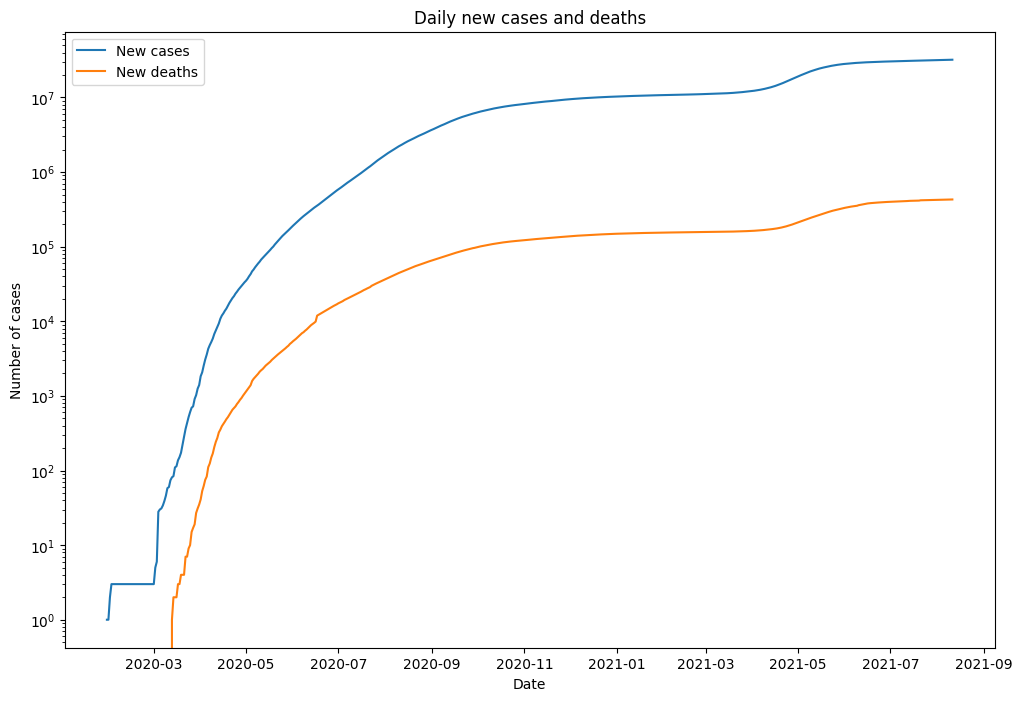

In [58]:
# Group by date and sum new cases and deaths
daily_data = covid_data.copy().groupby('Date')[['Confirmed', 'Deaths']].sum()

# Plot daily new cases and deaths
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(daily_data.index, daily_data['Confirmed'], label='New cases')
ax.plot(daily_data.index, daily_data['Deaths'], label='New deaths')

ax.set_xlabel('Date')
ax.set_ylabel('Number of cases')
ax.set_title('Daily new cases and deaths')
ax.set_yscale('log')
ax.legend()
plt.show()

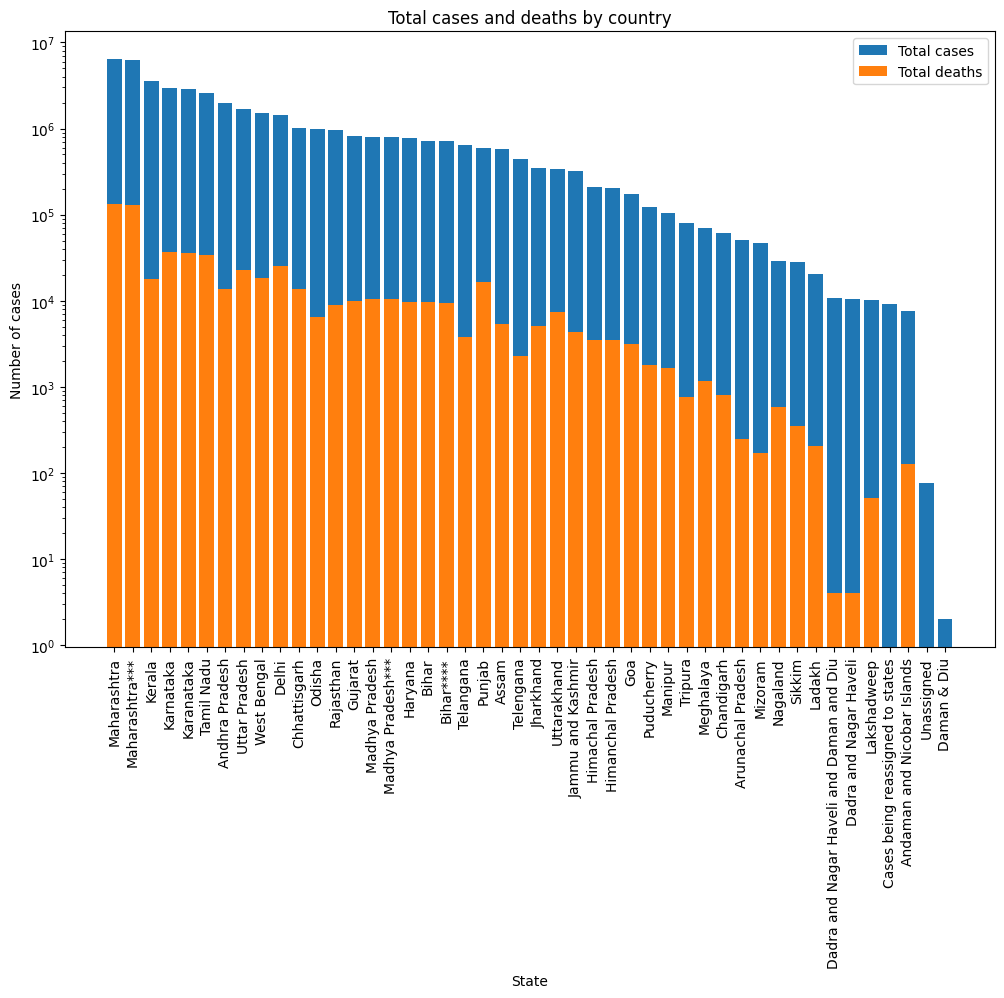

In [59]:
# Group by country and sum total cases and deaths
country_data = covid_data.copy().groupby('State/UnionTerritory')[['Confirmed', 'Deaths']].max()

# Sort by total cases
country_data = country_data.sort_values('Confirmed', ascending=False)

# Plot total cases and deaths by country
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(country_data.index, country_data['Confirmed'], label='Total cases')
ax.bar(country_data.index, country_data['Deaths'], label='Total deaths')
ax.set_xlabel('State')
ax.set_ylabel('Number of cases')
ax.set_title('Total cases and deaths by country')
ax.set_yscale('log')
ax.legend()
plt.xticks(rotation=90)
plt.show()

In [60]:
noOfDaysFromLast = 30
overallLags = 5

RMSE: 38100.387243781435
MAE: 27906.30220860454


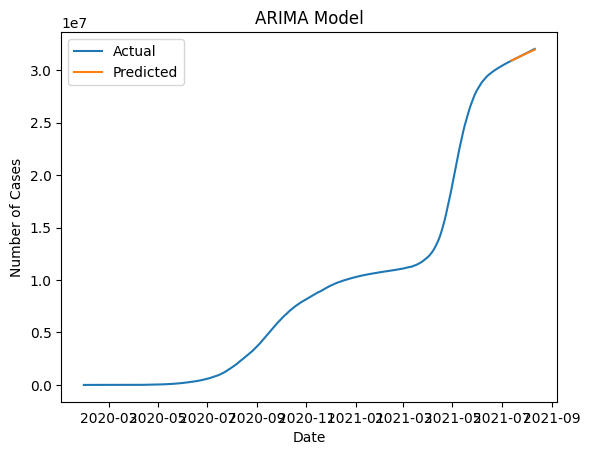

In [61]:
data = covid_data.copy().set_index('Date')
data = data.resample('D').sum()  # Resample to daily data

# Split data into train and test sets
train_data = data[:-noOfDaysFromLast]  # Train set excludes last 30 days
test_data = data[-noOfDaysFromLast:]  # Test set is last 30 days

# Fit ARIMA model to training data
model = ARIMA(endog=train_data['Confirmed'], exog=train_data[['Deaths', 'Cured']], order=(overallLags, 1, 1))
model_fit = model.fit()

# Make predictions on test set
predictions = model_fit.forecast(steps=len(test_data), exog=test_data[['Deaths', 'Cured']])

# Evaluate performance on test set
mse = mean_squared_error(test_data['Confirmed'], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f"MAE:", mean_absolute_error(test_data['Confirmed'], predictions))

# Plot actual vs predicted values
plt.plot(data.index, data['Confirmed'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

C:\Users\SUJITH\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 8631.26648503542
MAE: 5571.476575092723


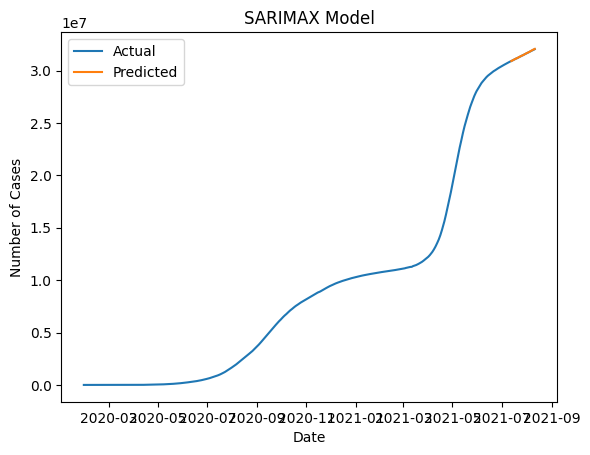

In [62]:
data = covid_data.copy()
data = data.set_index('Date')
data = data.resample('D').sum()  # Resample to daily data
data = data.drop('Sno', axis=1)

train_data = data.iloc[:-noOfDaysFromLast]
test_data = data.iloc[-noOfDaysFromLast:]

# Fit SARIMAX model to training data
model = SARIMAX(endog=train_data['Confirmed'], exog=train_data[['Deaths', 'Cured']], order=(overallLags, 1, 1), seasonal_order=(5, 1, 1, 7))
model_fit = model.fit()

# Make predictions on test set
predictions = model_fit.forecast(steps=len(test_data), exog=test_data[['Deaths', 'Cured']])

# Evaluate performance on test set
mse = mean_squared_error(test_data['Confirmed'], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f"MAE:", mean_absolute_error(test_data['Confirmed'], predictions))

# Plot actual vs predicted values
plt.plot(data.index, data['Confirmed'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

RMSE: 562998.1663431099
MAE: 427453.90194417787


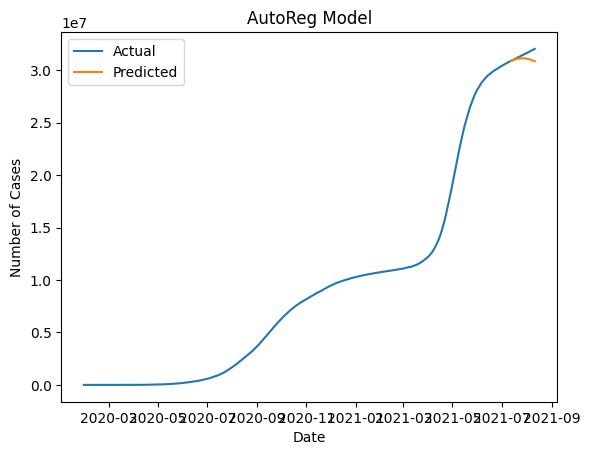

In [64]:
data = covid_data.copy()
data = data.set_index('Date')
data = data.resample('D').sum()  # Resample to daily data
data = data.drop('Sno', axis=1)
column_selected = 'Confirmed'

# Split into training and test sets 
train_data = data[:-noOfDaysFromLast]
test_data = data[-noOfDaysFromLast:]

# Fit autoregressive model to training data
model = AutoReg(endog=train_data[column_selected] ,lags=overallLags)
model_fit = model.fit()

# Make predictions on test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Evaluate performance on test set
mse = mean_squared_error(test_data[column_selected], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f"MAE:", mean_absolute_error(test_data['Confirmed'], predictions))

plt.plot(data.index, data[column_selected].values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('AutoReg Model')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [65]:
data = covid_data.copy()
data = data.drop('Time', axis=1)
data = data.drop('State/UnionTerritory', axis=1)
data = data.set_index('Date')
data = data.resample('D').sum()  # Resample to daily data
data = data.drop('Sno', axis=1)

In [66]:
import pandas as pd

# Custom function to convert to integer or return the original value
def convert_to_int_or_zero(value):
    try:
        return int(value)
    except ValueError:
        return 0

# Assuming df is your DataFrame and 'column_name' is the column you want to process
data['ConfirmedIndianNational'] = data['ConfirmedIndianNational'].apply(convert_to_int_or_zero)
data['ConfirmedForeignNational'] = data['ConfirmedForeignNational'].apply(convert_to_int_or_zero)

In [69]:
column_selected = 'Confirmed'
lags = range(1, overallLags+1)
for lag in lags:
    data[f'{column_selected}_{lag}'] = data[column_selected].shift(lag)

split = -noOfDaysFromLast
train_data = data.iloc[:split]
test_data = data.iloc[split:]


X_train = train_data.dropna().drop(column_selected, axis=1)
y_train = train_data.dropna()[column_selected]

model = LinearRegression()
model.fit(X_train, y_train)


X_test = test_data.dropna().drop(column_selected, axis=1)
y_test = test_data.dropna()[column_selected]

y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)


rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots() #figsize=(10, 5)
# Plot train data
ax.plot(data[column_selected], label='Train')
ax.plot(y_pred[::], label='Predictions')
plt.title('Actual vs Predicted COVID-19 Cases: AutoReg with LinReg Model')
ax.legend()
plt.show()

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana' 'Dadra and Nagar Haveli' 'Bihar****' 'Madhya Pradesh***'
 'Himanchal Pradesh' 'Karanataka' 'Maharashtra***']


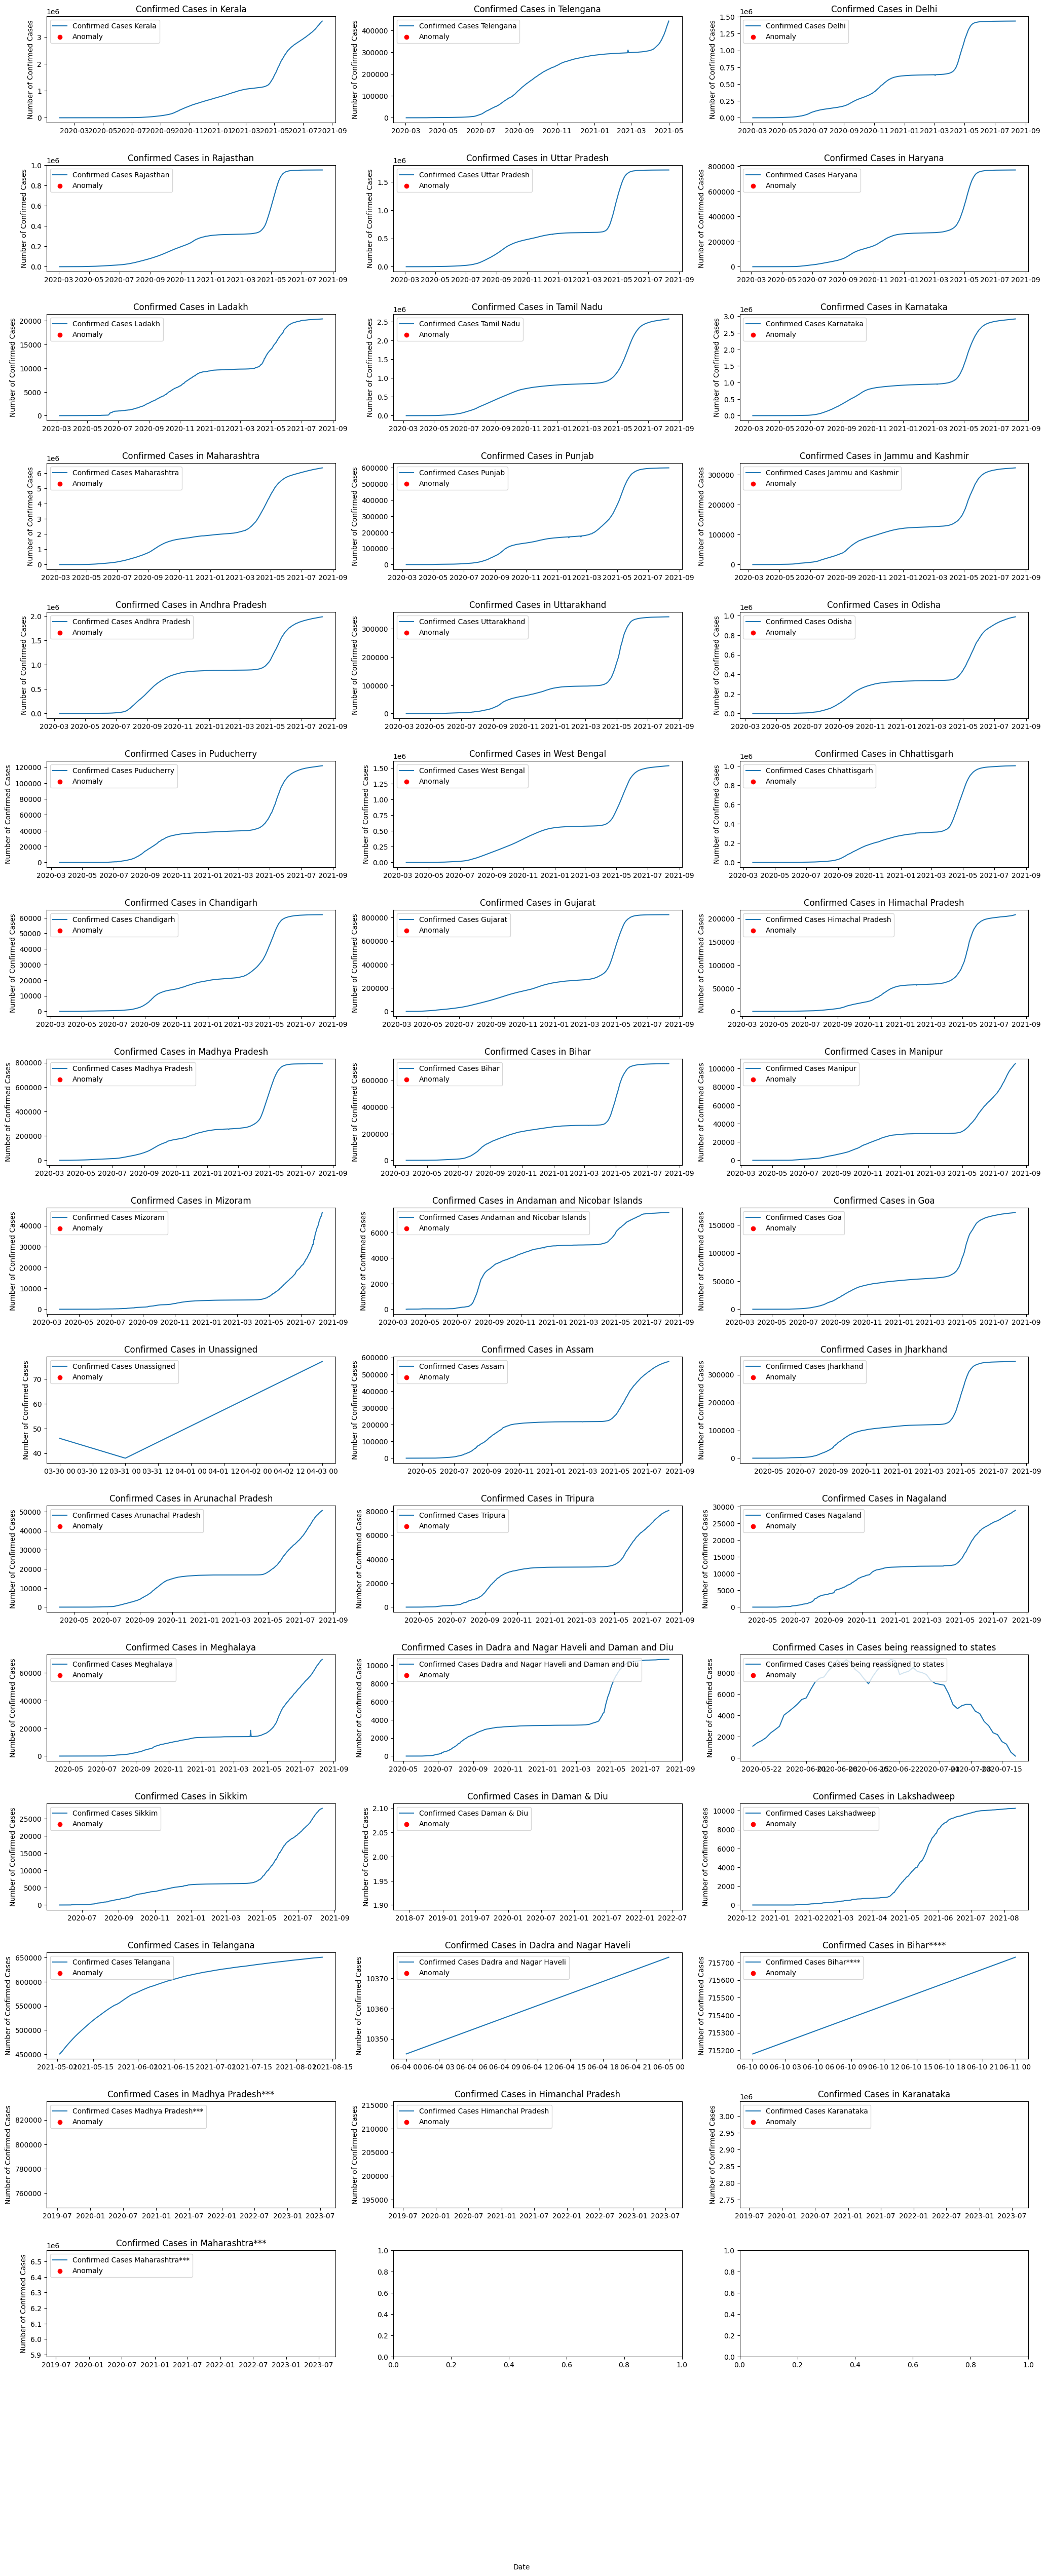

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

df = covid_data.copy()

allstates = df['State/UnionTerritory'].unique()
print(allstates)
cols_req = 3


fig, axs = plt.subplots(len(allstates)//cols_req+1, cols_req,  figsize=(25, 60), sharex=False, gridspec_kw={'hspace': 0.4})

# loop through the states and plot the time series for each
for i, state in enumerate(allstates):

    # subset the dataframe for the selected state and the Confirmed column
    df_state = df.loc[df['State/UnionTerritory'] == state, ['Date', 'Confirmed']]

    # convert the Date column to a datetime object
    df_state['Date'] = pd.to_datetime(df_state['Date'], format='%d-%m-%Y')

    # set the Date column as the dataframe index
    df_state.set_index('Date', inplace=True)

    # plot the time series
    axs[i//cols_req, i%cols_req].plot(df_state.index, df_state['Confirmed'], label=f'Confirmed Cases {state}')

    # detect anomalies using Isolation Forest algorithm
    model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
    model.fit(df_state)

    # add a column to the dataframe indicating whether each point is an anomaly or not
    df_state['Anomaly'] = pd.Series(model.predict(df_state)).apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
    
    # plot the anomalies in red
    axs[i//cols_req, i%cols_req].scatter(df_state.loc[df_state['Anomaly'] == 'Anomaly'].index, df_state.loc[df_state['Anomaly'] == 'Anomaly']['Confirmed'], color='red', label='Anomaly')

    # add title and y-label to the plot
    axs[i//cols_req, i%cols_req].set_title(f'Confirmed Cases in {state}')
    axs[i//cols_req, i%cols_req].set_ylabel('Number of Confirmed Cases')

    # show legend
    axs[i//cols_req, i%cols_req].legend(loc='upper left')

# add x-label to the plot
fig.text(0.5, 0.04, 'Date', ha='center')

# show the figure
plt.show()

C:\Users\SUJITH\AppData\Local\Temp\ipykernel_20348\2143693327.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['Confirmed_zscore'] = (df_period['Confirmed'] - df_period['Confirmed'].mean()) / df_period['Confirmed'].std()
C:\Users\SUJITH\AppData\Local\Temp\ipykernel_20348\2143693327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['Deaths_zscore'] = (df_period['Deaths'] - df_period['Deaths'].mean()) / df_period['Deaths'].std()


              Sno     Time State/UnionTerritory ConfirmedIndianNational  \
Date                                                                      
2021-03-13  12659  8:00 AM          Maharashtra                       -   
2021-03-14  12695  8:00 AM          Maharashtra                       -   
2021-03-15  12731  8:00 AM          Maharashtra                       -   
2021-03-16  12767  8:00 AM          Maharashtra                       -   
2021-03-17  12803  8:00 AM          Maharashtra                       -   
...           ...      ...                  ...                     ...   
2021-08-10  18069  8:00 AM           Tamil Nadu                       -   
2021-08-11  18090  8:00 AM            Karnataka                       -   
2021-08-11  18091  8:00 AM               Kerala                       -   
2021-08-11  18095  8:00 AM          Maharashtra                       -   
2021-08-11  18105  8:00 AM           Tamil Nadu                       -   

           ConfirmedFore

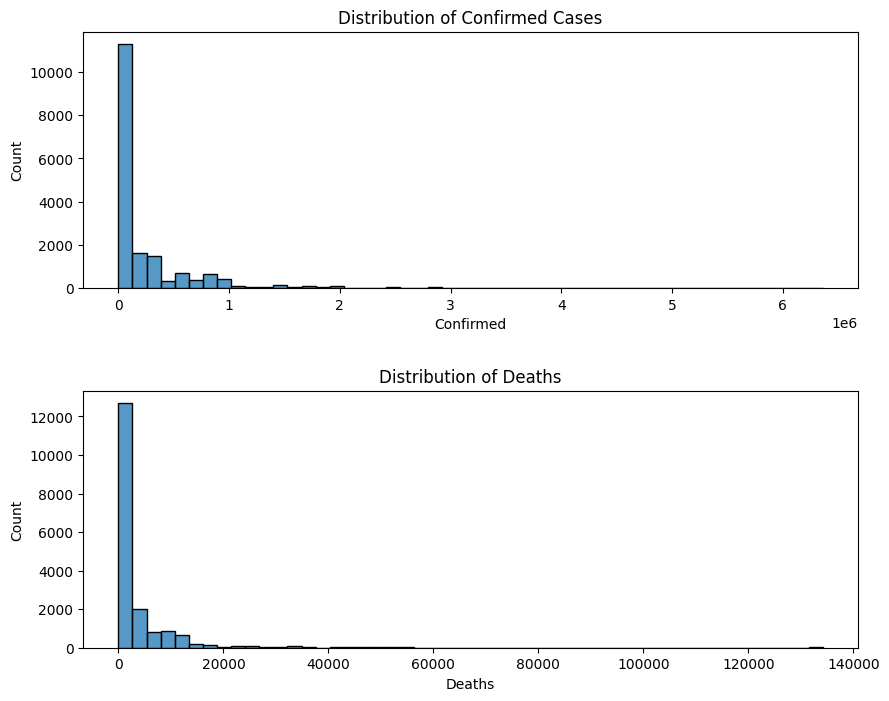

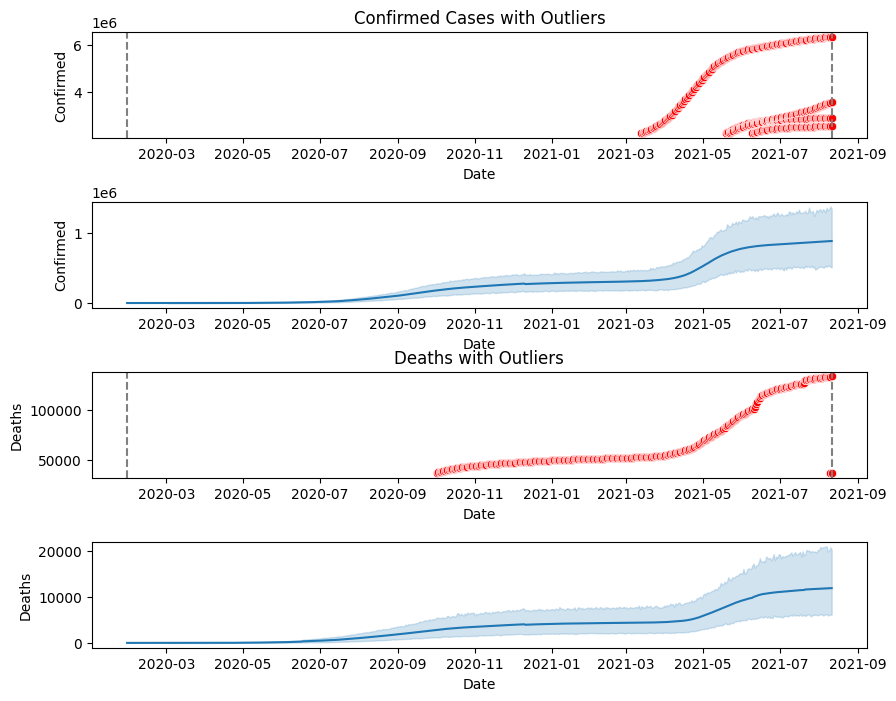

In [71]:
df = covid_data.copy()

# Set the date column as the index
df.set_index('Date', inplace=True)

start_date = '2020-01-30'#'2020-04-01'
end_date = '2021-08-11'#'2021-09-30'

# Create a new dataframe containing data for the specified time period
df_period = df.loc[start_date:end_date]

# Calculate the z-score of the Confirmed and Deaths columns
df_period['Confirmed_zscore'] = (df_period['Confirmed'] - df_period['Confirmed'].mean()) / df_period['Confirmed'].std()
df_period['Deaths_zscore'] = (df_period['Deaths'] - df_period['Deaths'].mean()) / df_period['Deaths'].std()

# Identify outliers using a z-score threshold of 3
outliers_confirmed = df_period[df_period['Confirmed_zscore'].abs() > 3]
outliers_deaths = df_period[df_period['Deaths_zscore'].abs() > 3]
print(outliers_confirmed)

# Plot the distribution of the Confirmed and Deaths columns
fig, axs = plt.subplots(2, 1, figsize=(10, 8),  gridspec_kw={'hspace': 0.4})
sns.histplot(df_period['Confirmed'], ax=axs[0], bins=50)
axs[0].set_title('Distribution of Confirmed Cases')
sns.histplot(df_period['Deaths'], ax=axs[1], bins=50)
axs[1].set_title('Distribution of Deaths')

# Plot the outliers for the Confirmed and Deaths columns
fig, axs = plt.subplots(4, 1, figsize=(10, 8),  gridspec_kw={'hspace': 0.6})

sns.lineplot(data=df_period, x=df_period.index, y='Confirmed', ax=axs[1])
sns.scatterplot(data=outliers_confirmed, x=outliers_confirmed.index, y='Confirmed', color='red', ax=axs[0])
axs[0].set_title('Confirmed Cases with Outliers')
axs[0].axvline(pd.to_datetime(start_date), linestyle='--', color='grey')
axs[0].axvline(pd.to_datetime(end_date), linestyle='--', color='grey')
sns.lineplot(data=df_period, x=df_period.index, y='Deaths', ax=axs[3])
sns.scatterplot(data=outliers_deaths, x=outliers_deaths.index, y='Deaths', color='red', ax=axs[2])
axs[2].set_title('Deaths with Outliers')
axs[2].axvline(pd.to_datetime(start_date), linestyle='--', color='grey')
axs[2].axvline(pd.to_datetime(end_date), linestyle='--', color='grey')

plt.show()